In [1]:
# Dependencies
import json
import tweepy
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

from config import consumer_key, consumer_secret, access_token, access_token_secret

In [2]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [4]:
# Create Array for Sentiment Analysis
Sentiment_Analysis = []

# Target Users
Media_Sources = ("@BBC", "@CBS", "@CNN", "@FoxNews", "@nytimes")

for source in Media_Sources:
    counter = 0
    
    #Get all tweets from each source.
    public_tweets = api.user_timeline(source, count = 100)

    for tweet in public_tweets:

        #Run Vader analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        tweet_text = tweet["text"]

        #Add sentiments for each tweet to the sentiments list.
        Sentiment_Analysis.append({"Media Sources" : source,
                           "Date": tweet["created_at"],
                           "Compound" : compound,
                           "Positive" : pos,
                           "Negative" : neg,
                           "Neutral" : neu,
                           "Tweets Ago" : counter,
                           "Tweet" : tweet_text})
        #Set
        counter += 1

In [5]:
#Create DataFrame.

Sentiments = pd.DataFrame.from_dict(Sentiment_Analysis)
Sentiments.head()

,Compound,Date,Media Sources,Negative,Neutral,Positive,Tweet,Tweets Ago
0,0.4019,Sat Feb 02 20:17:00 +0000 2019,@BBC,0.000,0.876,0.124,"As @OtiMabuse and @Joe_Sugg clearly show, you ...",0
1,0.4939,Sat Feb 02 17:55:15 +0000 2019,@BBC,0.000,0.856,0.144,RT @BBCRadio2: 🇺🇸🥧 @DonMcleanonline's 'America...,1
2,0.5106,Sat Feb 02 17:55:01 +0000 2019,@BBC,0.000,0.829,0.171,RT @BBCOne: My eye allergies are having a stro...,2
3,-0.7003,Sat Feb 02 17:54:53 +0000 2019,@BBC,0.266,0.734,0.000,RT @BBCiPlayer: Nearly half of the UK's popula...,3
4,0.6369,Sat Feb 02 17:54:48 +0000 2019,@BBC,0.000,0.865,0.135,RT @BBCRadio4: The news won't be the same with...,4


In [6]:
#Export DataFrame as csv file.

Sentiments.to_csv("News_Mood.csv", index=False)

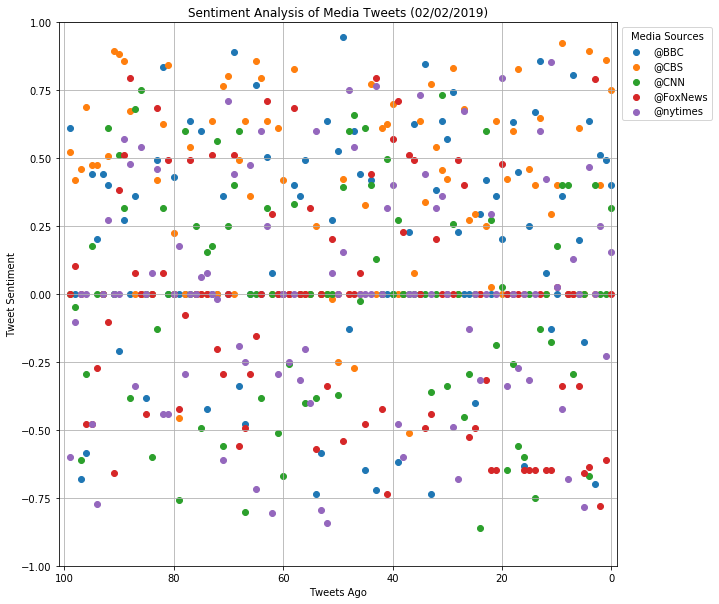

In [7]:
# Scatter Plot

plt.figure(figsize = (10,10))

#Set the x and limits
plt.xlim(101, -1)
plt.ylim(-1,1)

for source in Media_Sources:
    Analysis = Sentiments.loc[Sentiments["Media Sources"] == source]
    plt.scatter(Analysis["Tweets Ago"],Analysis["Compound"],label = source)
    
#Add legend box
plt.legend(bbox_to_anchor = (1,1), title = "Media Sources") 

#Define axes
plt.title("Sentiment Analysis of Media Tweets (02/02/2019)")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Sentiment")

#Save scatter plot
plt.savefig("Sentiment_Analysis_of_Media_Tweets.png")

plt.grid()
plt.show()

In [8]:
Overall_Sentiment = Sentiments.groupby("Media Sources")["Compound"].mean()
Overall_Sentiment

Media Sources
@BBC        0.159944
@CBS        0.342861
@CNN       -0.000941
@FoxNews   -0.051324
@nytimes    0.004008
Name: Compound, dtype: float64

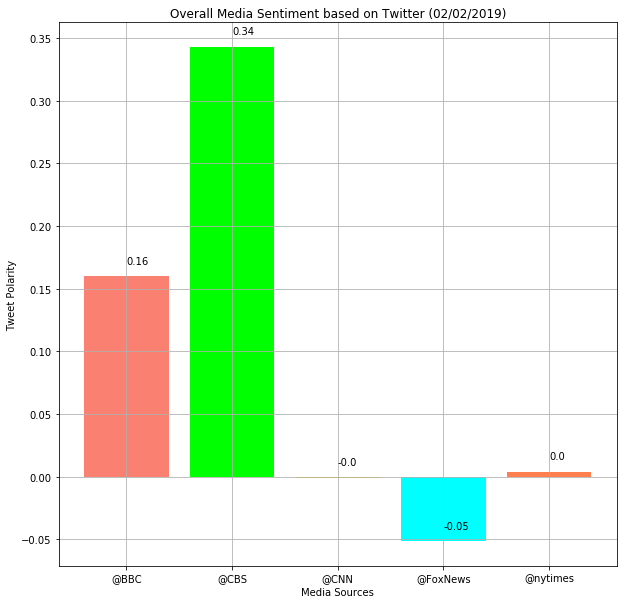

In [9]:
plt.figure(figsize = (10,10))

x_axis = np.arange(len(Overall_Sentiment))
xlabels = Overall_Sentiment.index
count = 0
for sentiment in Overall_Sentiment:
    plt.text(count, sentiment+.01, str(round(sentiment,2)))
    count = count + 1
plt.bar(x_axis, Overall_Sentiment, tick_label = xlabels, color = ["salmon", "lime", "gold", "cyan", "coral"])

#Define axis
plt.title("Overall Media Sentiment based on Twitter (02/02/2019)")
plt.xlabel("Media Sources")
plt.ylabel("Tweet Polarity")

#Save bar plot
plt.savefig("Overall_Media_Sentiment_based_on_Twitter")

plt.grid()
plt.show()